### Histograms
A histogram is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted depicting the number. For instance, using the default settings for matplotlib's hist function:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <a list of 10 Patch objects>)

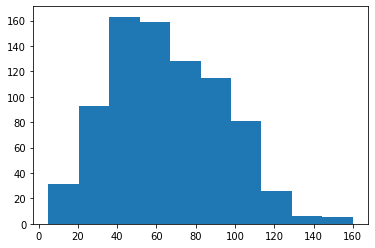

In [29]:
plt.hist(data = pokemon, x = 'speed')

You can see that there are eight data points that fall in the range between about 0 and 2.5 in the leftmost bin, and nine points in the range from about 2.5 to 5 in the adjacent bin. Overall, a generally bimodal distribution is observed (one with two peaks or humps). The direct adjacency of the bars in the histogram, in contrast to the separated bars in a bar chart, emphasize the fact that the data takes on a continuous range of values. When a data value is on a bin edge, it is counted in the bin to its right. The exception is the rightmost bin edge, which places data values equal to the uppermost limit into the right-most bin (to the upper limit's left).

By default, the hist function divides the data into 10 bins, based on the range of values taken. In almost every case, we will want to change these settings. Usually, having only ten bins is too few to really understand the distribution of the data. And the default tick marks are often not on nice, 'round' values that make the ranges taken by each bin easy to interpret. Wouldn't it be better if I said "between 0 and 2.5" instead of "between about 0 and 2.5", and "from 2.5 to 5" instead of "from about 2.5 to 5" above?

You can use descriptive statistics (e.g. via df['num_var'].describe()) to gauge what minimum and maximum bin limits might be appropriate for the plot. These bin edges can be set using numpy's arange function:

(array([  6.,  25.,  21.,  72.,  66.,  97.,  53., 106.,  64.,  64.,  69.,
         46.,  52.,  29.,  18.,   8.,   5.,   1.,   4.,   1.]),
 array([  5.  ,  12.75,  20.5 ,  28.25,  36.  ,  43.75,  51.5 ,  59.25,
         67.  ,  74.75,  82.5 ,  90.25,  98.  , 105.75, 113.5 , 121.25,
        129.  , 136.75, 144.5 , 152.25, 160.  ]),
 <a list of 20 Patch objects>)

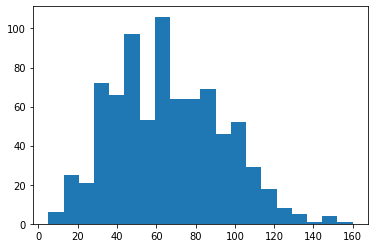

In [8]:
plt.hist(data = pokemon, x = 'speed', bins=20)

The first argument to arange is the leftmost bin edge, the second argument the upper limit, and the third argument the bin width. Note that even though I've specified the "max" value in the second argument, I've added a "+1" (the bin width). That is because arange will only return values that are strictly less than the upper limit. Adding in "+1" is a safety measure to ensure that the rightmost bin edge is at least the maximum data value, so that all of the data points are plotted. The leftmost bin is set as a hardcoded value to get a nice, interpretable value, though you could use functions like numpy's around if you wanted to approach that end programmatically.

(array([ 0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,
         1.,  0., 11.,  0.,  0.,  0.,  0., 13.,  0.,  1.,  4.,  1., 10.,
         0.,  1.,  4.,  3., 33.,  2.,  5.,  2.,  1., 26.,  6.,  2.,  3.,
         1., 36.,  2.,  8.,  8.,  3., 34.,  3.,  2.,  6.,  1., 45.,  3.,
         5.,  0.,  0., 29.,  4.,  4.,  8.,  3., 49.,  3.,  2.,  3.,  5.,
        40.,  4.,  4.,  6.,  1., 37.,  5.,  5.,  3.,  3., 15.,  3.,  3.,
         3.,  3., 33.,  3.,  1.,  4.,  4., 29.,  0.,  1.,  1.,  1., 29.,
         4.,  3.,  3.,  0., 27.,  2.,  7.,  3.,  3., 24.,  6.,  2.,  2.,
         2., 10.,  2.,  1.,  6.,  3., 11.,  2.,  3.,  1.,  1.,  8.,  2.,
         1.,  1.,  0.,  4.,  1.,  1.,  1.,  1.,  4.,  1.,  0.,  0.,  0.,
         5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15

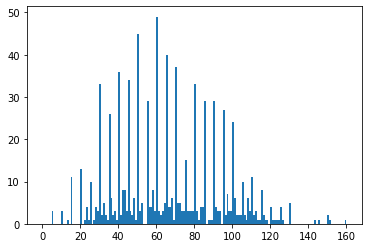

In [16]:
bins = np.arange(0, pokemon['speed'].max()+1, 1)
plt.hist(data = pokemon, x = 'speed', bins=bins)

Set the bin ranges add +5 to max value because a range will only include values lower than the max

(array([ 0.,  3.,  4., 11., 19., 18., 43., 38., 57., 46., 53., 48., 62.,
        55., 53., 27., 45., 32., 39., 42., 36., 22., 18., 12.,  8.,  5.,
         5.,  0.,  1.,  1.,  3.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160]),
 <a list of 32 Patch objects>)

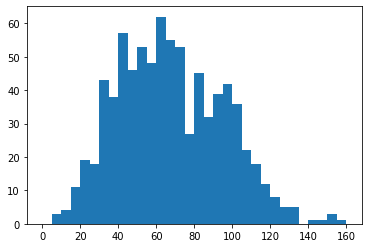

In [12]:
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins=bins)

When creating histograms, it's useful to play around with different bin widths to see what represents the data best. Too many bins, and you may see too much noise that interferes with identification of the underlying signal. Too few bins, and you may not be able to see the true signal in the first place.

This example puts two plots side by side through use of the subplot function, whose arguments specify the number of rows, columns, and index of the active subplot (in that order). The figure() function is called with the "figsize" parameter so that we can have a larger figure to support having multiple subplots. (More details on figures and subplots are coming up next in the lesson.)

### Alternative Approach
The seaborn function distplot can also be used to plot a histogram, and is integrated with other univariate plotting functions.

Alternative Approach
The seaborn function distplot can also be used to plot a histogram, and is integrated with other univariate plotting functions.

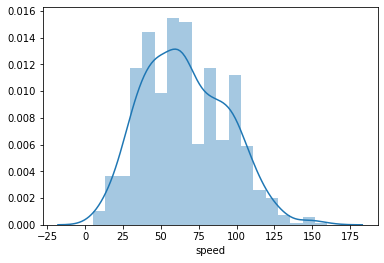

In [17]:
sb.distplot(pokemon['speed'])

The distplot function has built-in rules for specifying histogram bins, and by default plots a curve depicting the kernel density estimate (KDE) on top of the data. The vertical axis is based on the KDE, rather than the histogram: you shouldn't expect the total heights of the bars to equal 1, but the area under the curve should equal 1. If you want to learn more about KDEs, check out the extra page at the end of the lesson.

Despite the fact that the default bin-selection formula used by distplot might be better than the choice of ten bins that .hist uses, you'll still want to do some tweaking to align the bins to 'round' values. You can use other parameter settings to plot just the histogram and specify the bins like before:

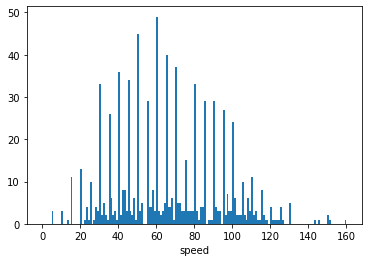

In [3]:
bin_edges = np.arange(0, pokemon['speed'].max()+1, 1)
sb.distplot(pokemon['speed'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})

The alpha (transparency) setting must be associated as a dictionary to "hist_kws" since there are other underlying plotting functions, like the KDE, that have their own optional keyword parameters.

The result of the code above is exactly like the histogram above with bin width of 1. The units of the vertical axis are also back in terms of counts.

In summary, if your exploration is only interested in the histogram-depiction of the data, and not the additional functionality offered by distplot, then you might be better off with just using Matplotlib's hist function for simplicity. On the other hand, if you want a quick start on choosing a representative bin size for histogram plotting, you might take a quick look at the basic distplot first before getting into the customization.

### Figures, Axes, and Subplots
At this point, you've seen and had some practice with some basic plotting functions using matplotlib and seaborn. The previous page introduced something a little bit new: creating two side-by-side plots through the use of matplotlib's subplot() function. If you have any questions about how that or the figure() function worked, then read on. This page will discuss the basic structure of visualizations using matplotlib and how subplots work in that structure.

The base of a visualization in matplotlib is a Figure object. Contained within each Figure will be one or more Axes objects, each Axes object containing a number of other elements that represent each plot. In the earliest examples, these objects have been created implicitly. Let's say that the following expression is run inside a Jupyter notebook to create a histogram:

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <a list of 10 Patch objects>)

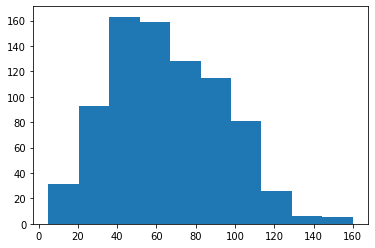

In [4]:
df = pokemon
plt.hist(data = df, x = 'speed')

Since we don't have a Figure area to plot inside, Python first creates a Figure object. And since the Figure doesn't start with any Axes to draw the histogram onto, an Axes object is created inside the Figure. Finally, the histogram is drawn within that Axes.

This hierarchy of objects is useful to know about so that we can take more control over the layout and aesthetics of our plots. One alternative way we could have created the histogram is to explicitly set up the Figure and Axes like this:

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <a list of 10 Patch objects>)

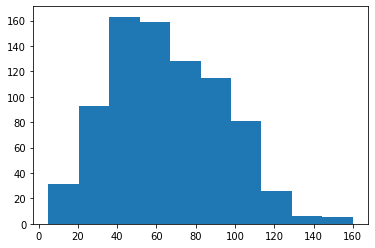

In [5]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data = df, x = 'speed')

figure() creates a new Figure object, a reference to which has been stored in the variable fig. One of the Figure methods is .add_axes(), which creates a new Axes object in the Figure. The method requires one list as argument specifying the dimensions of the Axes: the first two elements of the list indicate the position of the lower-left hand corner of the Axes (in this case one quarter of the way from the lower-left corner of the Figure) and the last two elements specifying the Axes width and height, respectively. We refer to the Axes in the variable ax. Finally, we use the Axes method .hist() just like we did before with plt.hist().

To use Axes objects with seaborn, seaborn functions usually have an "ax" parameter to specify upon which Axes a plot will be drawn.

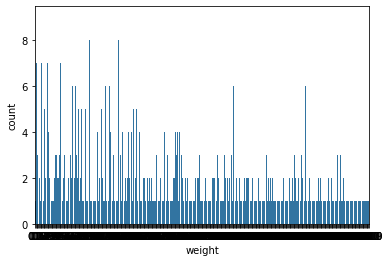

In [6]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'weight', color = base_color, ax = ax)

In the above two cases, there was no purpose to explicitly go through the Figure and Axes creation steps. And indeed, in most cases, you can just use the basic matplotlib and seaborn functions as is. Each function targets a Figure or Axes, and they'll automatically target the most recent Figure or Axes worked with. As an example of this, let's review in detail how subplot() was used on the Histograms page:

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  4.,  0.,  0.,  0.,  1.,  0.,  0.,  0., 10.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  3.,
         0.,  0.,  0., 33.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  5.,  0.,
         0.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  0., 26.,  0.,  0.,
         0.,  6.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,
         1.,  0.,  0.,  0., 36.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  8.,
         0.,  0.,  0.,  8.,  0.,  0.,  0.,  3.,  0.

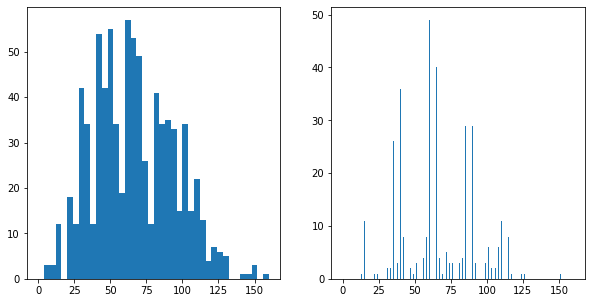

In [7]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df['speed'].max()+4, 4)
plt.hist(data = df, x = 'speed', bins = bin_edges)

# example of somewhat too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, df['speed'].max()+1/4, 1/4)
plt.hist(data = df, x = 'speed', bins = bin_edges)

First of all, plt.figure(figsize = [10, 5])creates a new Figure, with the "figsize" argument setting the width and height of the overall figure to 10 inches by 5 inches, respectively. Even if we don't assign any variable to return the function's output, Python will still implicitly know that further plotting calls that need a Figure will refer to that Figure as the active one.

Then, plt.subplot(1, 2, 1) creates a new Axes in our Figure, its size determined by the subplot() function arguments. The first two arguments says to divide the figure into one row and two columns, and the third argument says to create a new Axes in the first slot. Slots are numbered from left to right in rows from top to bottom. Note in particular that the index numbers start at 1 (rather than the usual Python indexing starting from 0). (You'll see the indexing a little better in the example at the end of the page.) Again, Python will implicitly set that Axes as the current Axes, so when the plt.hist() call comes, the histogram is plotted in the left-side subplot.

Finally, plt.subplot(1, 2, 2) creates a new Axes in the second subplot slot, and sets that one as the current Axes. Thus, when the next plt.hist() call comes, the histogram gets drawn in the right-side subplot.

### Choosing a Plot for Discrete Data
If you want to plot a discrete quantitative variable, it is possible to select either a histogram or a bar chart to depict the data.

The histogram is the most immediate choice since the data is numeric, but there's one particular consideration to make regarding the bin edges. Since data points fall on set values, it can help to reduce ambiguity by putting bin edges between the actual values taken by the data. Your readers may not know that values on bin edges end up in the bin to their right, so this can help remove potential confusion when they interpret the plot. Compare the two visualizations of 100 random die rolls below (in die_rolls), with bin edges _on_ the values in the left subplot, and bin edges in between values in the right subplot.

```
plt.figure(figsize = [10, 5])

# histogram on the left, bin edges on integers
plt.subplot(1, 2, 1)
bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(die_rolls, bins = bin_edges)
plt.xticks(np.arange(2, 12+1, 1))

# histogram on the right, bin edges between integers
plt.subplot(1, 2, 2)
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(die_rolls, bins = bin_edges)
plt.xticks(np.arange(2, 12+1, 1))
```
![image](https://video.udacity-data.com/topher/2018/March/5aa9881b_l3-c10-dierolls1/l3-c10-dierolls1.png)

```
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(die_rolls, bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(2, 12+1, 1))
```

With "rwidth" set to 0.7, the bars will take up 70% of the space allocated by each bin, with 30% of the space left empty. This changes the default display of the histogram (which you could think of as "rwidth = 1") into a bar chart.

![image](https://video.udacity-data.com/topher/2018/March/5aa996d1_l3-c10-dierolls2/l3-c10-dierolls2.png)

By adding gaps between bars, you emphasize the fact that the data is discrete in value. On the other hand, plotting your quantitative data in this manner might cause it to be interpreted as ordinal-type data, which can have an effect on overall perception.

For continuous numeric data, you should not make use of the "rwidth" parameter, since the gaps imply discreteness of value. As another caution, it might be tempting to use seaborn's countplot function to plot the distribution of a discrete numeric variable as bars. Be careful about doing this, since each unique numeric value will get a bar, regardless of the spacing in values between bars. (For example, if the unique values were {1, 2, 4, 5}, missing 3, countplot would only plot four bars, with the bars for 2 and 4 right next to one another.) Also, even if your data is technically discrete numeric, you should probably not consider either of the variants depicted on this page unless the number of unique values is small enough to allow for the half-unit shift or discrete bars to be interpretable. If you have a large number of unique values over a large enough range, it's better to stick with the standard histogram than risk interpretability issues.

While you might justify plotting discrete numeric data using a bar chart, you’ll be less apt to justify the opposite: plotting ordinal data as a histogram. The space between bars in a bar chart helps to remind the reader that values are not contiguous in an ‘interval’-type fashion: only that there is an order in levels. With that space removed as in a histogram, it's harder to remember this important bit of interpretation.